# Mathplotlib

### Упражнение 1 (Эксперименты)

Составьте произвольный набор данных. Постройте на них график, подходящий для отчета по общей физике. 

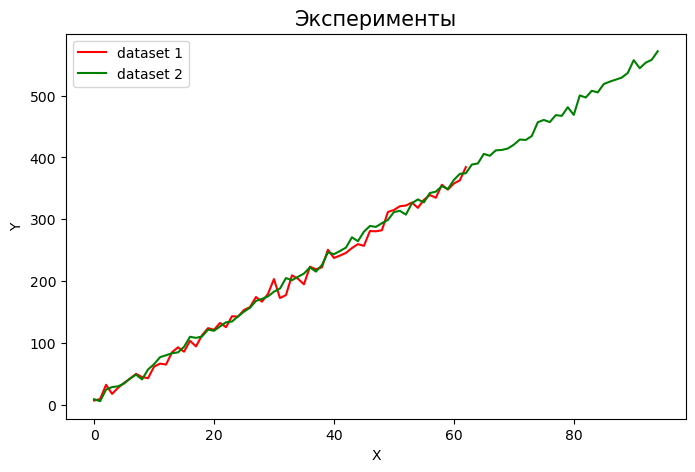

In [29]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def datasets(a, b):
    
    data_size = random.randint(50, 100)
    x = np.arange(0, data_size, 1.)
    delta = np.empty((data_size, 1))
    y = np.empty((data_size, 1))
    sigma = random.uniform(1, 10)
    
    mu = 0.0 # допустим

    for i in range(data_size):
        delta[i] = random.gauss(mu, sigma)
        y[i] = a + b*x[i] + delta[i]
        
    return x, y


xy = datasets(2, 6)
nz = datasets(4, 6)
x, y = xy[0], xy[1]
n, z = nz[0], nz[1]
plt.figure(figsize=(8,5), dpi=100)
plt.plot(x, y, 'r', label='dataset 1')
plt.plot(n, z, 'g', label='dataset 2')
plt.title('Эксперименты', fontdict={'fontname': 'sans-serif', 'fontsize': 15})
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Упражнение 2 (Стремление к нормальности)

Постройте на одном рисунке (но разных подграфиках) несколько гистограмм, которые покажут, что с увеличением количества точек полученных из распределения, гистограмма значений этих точек стремится к этому распределению. 

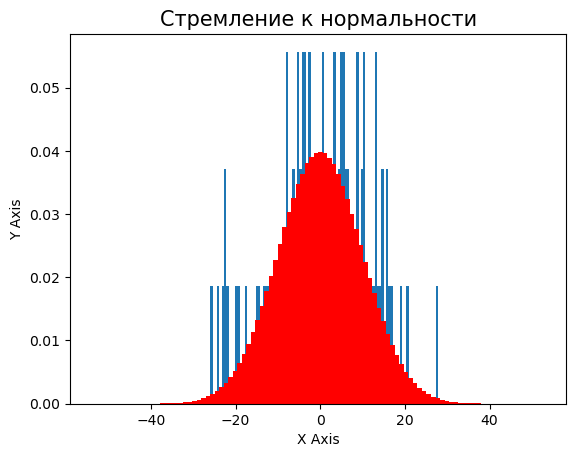

In [46]:
import random
import numpy as np
import matplotlib.pyplot as plt

pos = 0
scale = 10
size_1 = 100
size_2 = 10000000
values_1 = np.random.normal(pos, scale, size_1)
values_2 = np.random.normal(pos, scale, size_2)
plt.hist(values_1, 100, density=True)
plt.hist(values_2, 100, density=True, color='r', label=None)
plt.title('Стремление к нормальности', fontdict={'fontname': 'sans-serif', 'fontsize': 15})
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

### Упражнение 3 (Пироги с цветами)
Постройте из файла iris_data -- стандартного датасета цветков ириса -- две круговые диаграммы: доля видов (Species) ирисов в датасете, Доли ирисов, у которых длина лепестка (PetalLengthCm) больше 1.2см, больше 1.2см и меньше 1.5см, больше 1.5см.


([<matplotlib.patches.Wedge at 0x7f7574ae8710>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris-setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris-versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Iris-virginica')])

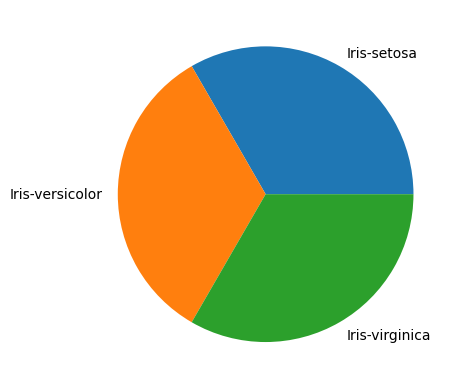

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('iris_data.csv')
labels_1 = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']
quantity = df['Species'].value_counts()

fig, ax = plt.subplots()
plt.title('Доля видов ирисов', fontdict={'fontname': 'sans-serif', 'fontsize': 15})
ax.pie(quantity, labels=labels_1)

([<matplotlib.patches.Wedge at 0x7f75748f22d0>,
 [Text(1.0987909806905718, 0.0515594875173511, '< 1.2'),
  Text(0.9439155391173445, 0.5648216134434065, '1.2 < x < 1.5'),
  Text(-0.9693525200808615, -0.5199573942284916, '> 1.2')])

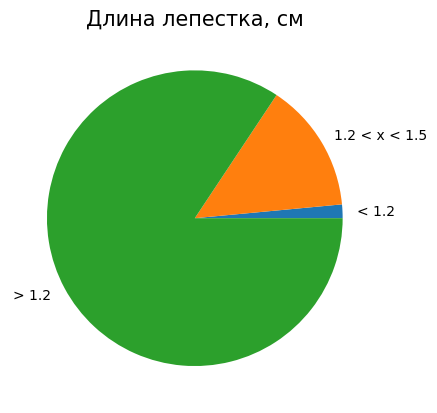

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

q_len = pd.DataFrame()

df = pd.read_csv('iris_data.csv')
length = df['PetalLengthCm']
rare = int(length[length < 1.2].count())
medium = int(length[(length > 1.2) & (length < 1.5)].count())
well = int(length[length > 1.5].count())
llist = [rare, medium, well]

labels_2 = ['< 1.2', '1.2 < x < 1.5', '> 1.2'] 
fig, ax = plt.subplots()
plt.title('Длина лепестка, см', fontdict={'fontname': 'sans-serif', 'fontsize': 15})
ax.pie(llist, labels=labels_2)


### Упражнение 4 (Подгониан)
Постройте из файла iris_data все возможные комбинации длин и ширин лепестков и чашелистников (Petal и Sepal). Можно ли заметить какие-либо закономерности? Если да, попробуйте построить прямую МНК и вывести на экран ее коэффициенты. 


[0.41641913] [-0.36651405]
[-0.05726823] [3.38863738]


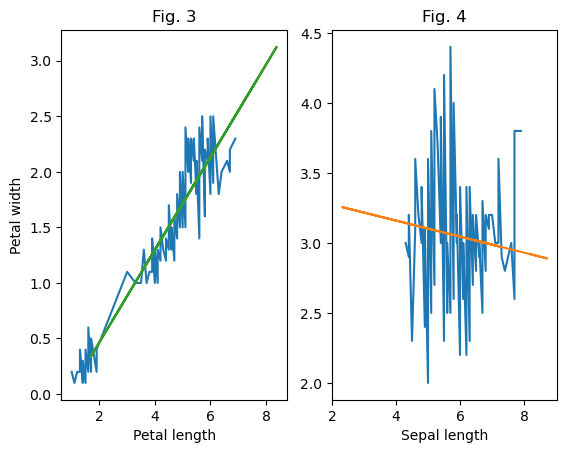

In [289]:
import itertools
import matplotlib.pyplot as plt
import random 
import numpy as np

def mnk(x, y):
    
    size = len(x)
    
    vector = np.empty((2, 1))
    vector[0] = sum((x[i]*y[i]) for i in range(0, size))
    vector[1] = sum((y[i]) for i in range(0, size))
    
    matrix = np.empty((2, 2))
    matrix[[0], [0]] = sum((x[i])**2 for i in range(0, size))
    matrix[[0], [1]] = sum(x)
    matrix[[1], [0]] = sum(x)
    matrix[[1], [1]] = size
    
    opposite = np.linalg.inv(matrix)
    
    ab = np.dot(opposite, vector)
    a = ab[0]
    b = ab[1]
    
    return a, b

df = pd.read_csv('iris_data.csv')

petal = pd.DataFrame()
sepal = pd.DataFrame()

petal['PetalLengthCm'] = df['PetalLengthCm']
petal['PetalWidthCm'] = df['PetalWidthCm']
sepal['SepalLengthCm'] = df['SepalLengthCm']
sepal['SepalWidthCm'] = df['SepalWidthCm']

# комбинации без вывода:
lengths = pd.DataFrame(itertools.product(petal['PetalLengthCm'], petal['PetalWidthCm']))
widths = pd.DataFrame(itertools.product(sepal['SepalLengthCm'], sepal['SepalWidthCm']))

a_pet, b_pet = mnk(petal['PetalLengthCm'], petal['PetalWidthCm'])
a_sep, b_sep = mnk(sepal['SepalLengthCm'], sepal['SepalWidthCm'])
print(a_pet, b_pet)
print(a_sep, b_sep)

petal.sort_values(by=['PetalLengthCm', 'PetalWidthCm'], ascending = True, inplace = True)
sepal.sort_values(by=['SepalLengthCm', 'SepalWidthCm'], ascending = True, inplace = True)

# создаю данные по оси x для модельных аппроксимирующих прямых с коэфф. МНК
ref_petal = np.random.uniform(0, 10, 10)
ref_sepal = np.random.uniform(0, 10, 10)
function_petal = a_pet * ref_petal + b_pet
function_sepal = a_sep * ref_sepal + b_sep
x_len, y_len = lengths[0], lengths[1]


plt.subplot(1, 2, 1)
plt.plot(petal['PetalLengthCm'], petal['PetalWidthCm'])
plt.plot(ref_petal, function_petal)
plt.title('Fig. 3')
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.plot(ref_petal, function_petal)

plt.subplot(1, 2, 2)
plt.title('Fig. 4')
plt.plot(sepal['SepalLengthCm'], sepal['SepalWidthCm'])
plt.plot(ref_sepal, function_sepal)
plt.xlabel("Sepal length")
plt.show()


# plt.ylabel("Sepal width")

In [141]:
import itertools
a = [1,2,3,4]
b = ['A','B']
for x in (itertools.product(a,b)):
    print(' '.join(map(str,x)))

1 A
1 B
2 A
2 B
3 A
3 B
4 A
4 B


### Упражнение 5 (Ты родился слишком поздно, чтобы ...)
В файле BTC_data лежат ежедневные значения цены биткоина на бирже с 2018 по 2023 год. Не будем вдаваться в подробности, чем отличаются четыре указанные цены, нас интересует только последнее число в каждой строке -- цена закрытия (close) и дата, первое значение в каждой строке. Постройте исторический график зависимости цены биткоина от времени. В качестве зарубок по оси X используйте даты в формате DD-MM-YY (например 06-03-2005 -- означает 6 марта 2005 года).


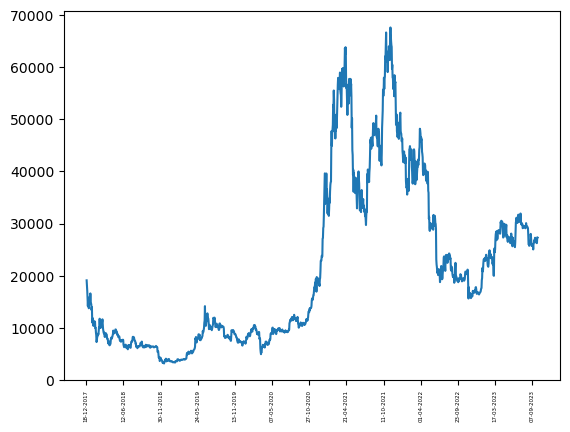

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker

f = pd.read_csv('BTC_data.csv')
close = list(f["close"])
time = list(f["time"])
time = [i[8:10] + i[4:8] + i[0:4] for i in time]

fig = plt.figure()
subplt = fig.add_subplot(1, 1, 1)

plt.xticks(range(len(time)), labels=time, rotation=90, fontsize=4)
plt.plot(range(1, len(time) + 1), close)
subplt.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(120))
plt.show()

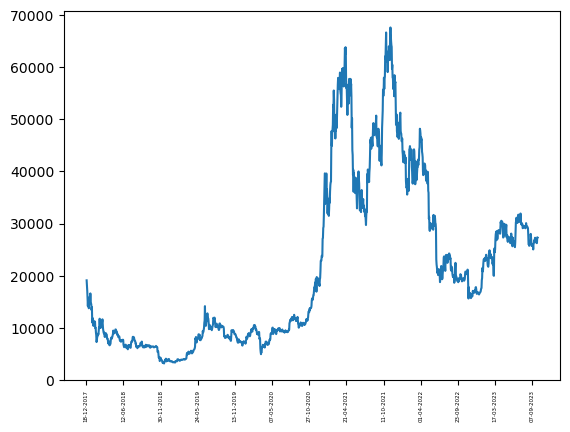

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker

f = pd.read_csv('BTC_data.csv')
close = list(f["close"])
time = list(f["time"])
time = [i[8:10] + i[4:8] + i[0:4] for i in time]

m = plt.figure()
n = m.add_subplot(1, 1, 1)

plt.xticks(range(len(time)), labels=time, rotation=90, fontsize=4)
plt.plot(range(1, len(time) + 1), close)
n.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(120))
plt.show()

### Упражнение 6 (Мечта финансиста)
Кроме функции `interp` в `numpy` также есть функция `polyfit`. Попробуйте аппроксимировать цену биткоина каким-нибудь полиномом и постройте его на том же графике, что график цены.

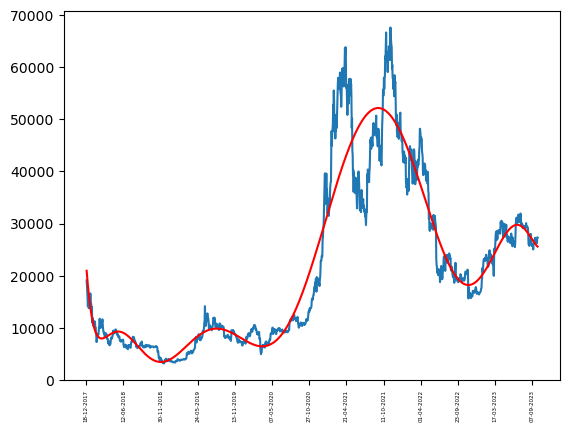

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker

f = pd.read_csv('BTC_data.csv')
close = list(f["close"])
time = list(f["time"])
time = [i[8:10] + i[4:8] + i[0:4] for i in time]

plf = np.polyfit(range(1, len(time) + 1), close, 12)

fig = plt.figure()
n = fig.add_subplot(1, 1, 1)
plt.xticks(range(len(time)), labels=time, rotation=90, fontsize=4)
plt.plot(range(1, len(time) + 1), close)
n.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(120))
plt.plot(range(1, len(time) + 1), p(range(1, len(time) + 1)), color="r")
plt.show()

## Практическая работа по использованию словарей

### Упражнение №7 (Буквоед)

Дан текст на некотором языке. Требуется подсчитать сколько раз каждое
слово входит в этот текст и вывести десять самых часто употребяемых слов
в этом тексте и количество их употреблений.

В качестве примера возьмите файл с текстом лицензионного соглашения
Python `/usr/share/licenses/python/LICENSE`.

Подсказка №1: Используйте словарь, в котором ключ \-- слово, а значение
\-- количество таких слов.

Подсказка №2: Точки, запятые, вопросы и восклицательные знаки перед
обработкой замените пробелами (используйте [punctuation](https://docs.python.org/2/library/string.html#string.punctuation)
из модуля string).

Подсказка №3: Все слова приводите к нижнему регистру при помощи метода
строки `lower()`.

Подсказка №4: По окончании сбора статистики нужно пробежать по всем
ключам из словаря и найти ключ с максимальным значением.

### Упражнение №8 (Счетовод)

Задайте два списка чисел. Выведите числа:
* Уникальные для каждого списка
* Уникальные для объединения этих списков
* Содержащиеся в обоих списках
используя множества и логические операции с ними.

In [208]:
numbers_1 = list(map(int, input().split()))
numbers_2 = list(map(int, input().split()))
unique_1 = set(numbers_1)
unique_2 = set(numbers_2)
unique_union = set(unique_1 & unique_2)
all_n = set(numbers_1 + numbers_2)

if unique_union == set():
    unique_union = '-'
print(*list(unique_1))
print(*list(unique_2))
print(*list(all_n))
print(*list(unique_union))

1 2 3
4 5 6
1 2 3
4 5 6
1 2 3 4 5 6
-
